In [1]:
from pymongo import MongoClient
from urllib.parse import quote_plus as url
import pandas as pd
import steam.webauth as wa
import os
import ast
import matplotlib.pyplot as plt
import requests
%matplotlib inline

In [2]:
with open('data/reviews_fixed.txt') as f:
    reviews = eval(f.read())

In [3]:
client = MongoClient()
db = client['steam_test']

In [4]:
collection = db['reviews']

In [10]:
for x in reviews:
    collection.insert_many(x)

In [12]:
df = pd.DataFrame(list(collection.find()))

In [16]:
len(df.app.unique())

8119

In [21]:
db.collection_names()

/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: collection_names is deprecated. Use list_collection_names instead.
  """Entry point for launching an IPython kernel.


['test_collection', 'reviews']

In [10]:
user = wa.WebAuth(os.environ['STEAM_ID'], os.environ["STEAM_PASSWORD"])
session = user.login()
app = 753
item = '278440-Planetary%20Graveyard%20%28Foil%20Trading%20Card%29'
response = session.get('https://steamcommunity.com/market/pricehistory/?appid={}&market_hash_name={}'.format(app, item))

In [11]:
response

<Response [200]>

In [12]:
response.text

'{"success":true,"price_prefix":"$","price_suffix":"","prices":[["Nov 12 2014 01: +0",1.085,"1"],["Nov 13 2014 01: +0",2.488,"1"],["Nov 20 2014 01: +0",6.267,"1"],["Dec 11 2014 01: +0",6.163,"1"],["Dec 14 2014 01: +0",5.764,"1"],["Jan 01 2015 01: +0",1.816,"1"],["Jan 09 2015 01: +0",0.588,"1"],["Jan 15 2015 01: +0",0.937,"2"],["Jan 22 2015 01: +0",0.89,"1"],["Jan 23 2015 01: +0",0.874,"1"],["Jan 31 2015 01: +0",0.89,"1"],["Feb 02 2015 01: +0",0.89,"1"],["Feb 10 2015 01: +0",0.129,"1"],["Feb 20 2015 01: +0",0.797,"1"],["Mar 27 2015 01: +0",0.796,"1"],["Apr 06 2015 01: +0",0.819,"1"],["Apr 07 2015 01: +0",0.825,"1"],["Apr 09 2015 01: +0",0.88,"1"],["Apr 12 2015 01: +0",0.87,"1"],["May 13 2015 01: +0",0.767,"1"],["Jun 04 2015 01: +0",0.787,"1"],["Jun 17 2015 01: +0",0.895,"1"],["Jun 22 2015 01: +0",1.268,"1"],["Jun 24 2015 01: +0",1.27,"1"],["Jun 25 2015 01: +0",1.28,"1"],["Jul 10 2015 01: +0",1.575,"1"],["Aug 08 2015 01: +0",1.97,"1"],["Sep 20 2015 01: +0",2.029,"1"],["Dec 09 2015 01: +0

In [18]:
mongo_dict = {'item_name':item, 'app': app, 'prices':[]}
for x in response.json()['prices']:
    mongo_dict['prices'].append({'date':x[0], 'median_sell_price':x[1], 'quantity':x[2]})

In [22]:
collection = db['market']

In [23]:
collection.insert(mongo_dict)

/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: insert is deprecated. Use insert_one or insert_many instead.
  """Entry point for launching an IPython kernel.


ObjectId('5b62877e8267aeac546b1fe3')

In [24]:
collection.find_one()

{'_id': ObjectId('5b62877e8267aeac546b1fe3'),
 'item_name': '278440-Planetary%20Graveyard%20%28Foil%20Trading%20Card%29',
 'app': 753,
 'prices': [{'date': 'Nov 12 2014 01: +0',
   'median_sell_price': 1.085,
   'quantity': '1'},
  {'date': 'Nov 13 2014 01: +0', 'median_sell_price': 2.488, 'quantity': '1'},
  {'date': 'Nov 20 2014 01: +0', 'median_sell_price': 6.267, 'quantity': '1'},
  {'date': 'Dec 11 2014 01: +0', 'median_sell_price': 6.163, 'quantity': '1'},
  {'date': 'Dec 14 2014 01: +0', 'median_sell_price': 5.764, 'quantity': '1'},
  {'date': 'Jan 01 2015 01: +0', 'median_sell_price': 1.816, 'quantity': '1'},
  {'date': 'Jan 09 2015 01: +0', 'median_sell_price': 0.588, 'quantity': '1'},
  {'date': 'Jan 15 2015 01: +0', 'median_sell_price': 0.937, 'quantity': '2'},
  {'date': 'Jan 22 2015 01: +0', 'median_sell_price': 0.89, 'quantity': '1'},
  {'date': 'Jan 23 2015 01: +0', 'median_sell_price': 0.874, 'quantity': '1'},
  {'date': 'Jan 31 2015 01: +0', 'median_sell_price': 0.89, 

In [42]:
with open('data/sourced_id_to_name.txt') as f:
    steam = ast.literal_eval(f.read())
with open('steam_capstone/item_names_non_empty.txt') as g:
    old_names = ast.literal_eval(g.read())

In [30]:
steam.keys()

dict_keys(['614910', '603750', '562430', '308080', '270880', '530700', '290340', '582810', '489940', '411480', '485610', '296300', '238460', '650580', '550650', '845870', '531960', '529840', '429780', '829080', '615050', '397900', '302670', '544840', '730', '749780', '447820', '672490', '346930', '274940', '663920', '322330', '570', '374670', '417860', '744760', '227300', '391240', '364640', '486780', '868080', '571740', '431240', '369990', '433850', '581740', '679990', '433530', '374280', '457960', '560080', '520530', '348670', '363360', '513510', '728540', '295110', '232090', '731640', '874100', '420900', '534210', '516940', '299740', '749830', '323850', '4920', '471550', '643270', '218620', '578080', '238960', '321360', '508710', '338170', '764030', '708940', '517710', '328070', '663690', '270450', '843660', '252490', '244930', '366440', '464350', '496960', '684580', '530300', '590790', '528970', '244850', '207140', '381250', '753', '250820', '264710', '787240', '321400', '440', '43

In [31]:
old_names.keys()

dict_keys([238460, 570, 218620, 227300, 323850, 366440, 321360, 381250, 230410, 431960, 299740, 270450, 520530, 321400, 757160, 274940, 517710, 513510, 374280, 730, 244930, 562430, 437220, 270880, 263920, 374670, 777010, 369990, 530300, 486780, 464350, 727300, 776200, 360620, 417860, 791550, 764030, 841860, 534210, 264710, 348670, 4920, 238960, 338170, 531960, 544840, 650580, 794870, 420900, 508710, 440, 328070, 391240, 308080, 516940, 296300, 364640, 453170, 603750, 496960, 232090, 578080, 447820, 207140, 429780, 528970, 614910, 302670, 571740, 560080, 304930, 431240, 411480, 397900, 643270, 295110, 529840, 244850, 615050, 346930, 676340, 740120, 731640, 672110, 754780, 733190, 710080, 789470, 787240, 581740, 679990, 654700, 433850, 530700, 322330, 655010, 744760, 708940, 252490, 722670, 663690, 471550, 290340, 550650, 489940, 793720, 363360, 684580, 749820, 809370, 771950, 663920, 749830, 433530, 824660, 829080, 582810, 485610, 843660, 672490, 679650, 845870, 749780, 781600, 753])

In [46]:
y = steam.copy()
for x in steam.keys():
    if int(x) not in old_names.keys():
        y.pop(x)

In [47]:
len(y)

106

In [48]:
y

{'614910': '#monstercakes',
 '603750': '- Arcane Raise -',
 '562430': 'Alien Hostage',
 '308080': 'Altitude0: Lower & Faster',
 '270880': 'American Truck Simulator',
 '530700': 'Argo',
 '290340': 'Armello',
 '582810': 'Awesome Metal Detecting',
 '489940': 'BATTALION 1944',
 '411480': 'BATTLECREW Space Pirates',
 '485610': 'Ball 3D: Soccer Online',
 '296300': 'Ballistic Overkill',
 '238460': 'BattleBlock Theater',
 '650580': 'Be Quiet!',
 '550650': 'Black Squad',
 '845870': 'Black_Faith.',
 '531960': 'Bloody Walls',
 '529840': 'Brawl of Ages',
 '429780': 'Bunny Hop League',
 '829080': 'Burst Into',
 '615050': 'Burst The Game',
 '397900': 'Business Tour - Online Multiplayer Board Game',
 '302670': 'Call to Arms',
 '544840': 'Children of Orc',
 '730': 'Counter-Strike: Global Offensive',
 '749780': 'DEAD DOZEN',
 '447820': 'Day of Infamy',
 '672490': 'DeDrive',
 '346930': 'Deadhold',
 '274940': 'Depth',
 '663920': 'Died Of Fear',
 '322330': "Don't Starve Together",
 '570': 'Dota 2',
 '3746

In [43]:
len(steam)

114

In [36]:
for x in old_names.keys():
    if str(x) not in steam.keys():
        print(x)

777010
727300
776200
360620
791550
841860
794870
453170
740120
672110
754780
733190
710080
789470
793720
809370
824660
679650
781600


In [50]:
num_items = []
for x in old_names:
    num_items.append(len(old_names[x]))

(array([118.,   1.,   1.,   1.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   2.]),
 array([1.000000e+00, 1.580150e+03, 3.159300e+03, 4.738450e+03,
        6.317600e+03, 7.896750e+03, 9.475900e+03, 1.105505e+04,
        1.263420e+04, 1.421335e+04, 1.579250e+04, 1.737165e+04,
        1.895080e+04, 2.052995e+04, 2.210910e+04, 2.368825e+04,
        2.526740e+04, 2.684655e+04, 2.842570e+04, 3.000485e+04,
        3.158400e+04]),
 <a list of 20 Patch objects>)

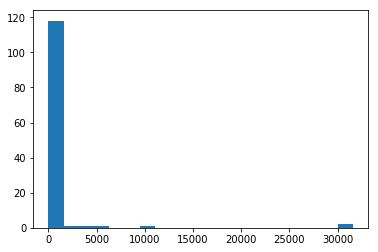

In [62]:
plt.hist(num_items, bins=20)

In [60]:
num_items.pop()

174910

In [63]:
sum(num_items)

97981

In [68]:
y.pop('753')

'Steam'

In [69]:
len(y)

105

In [72]:
y[['730', '570']]

TypeError: unhashable type: 'list'

In [77]:
d = {}
for x in y.keys():
    d[int(x)] = old_names[int(x)]

In [80]:
d.keys()

dict_keys([614910, 603750, 562430, 308080, 270880, 530700, 290340, 582810, 489940, 411480, 485610, 296300, 238460, 650580, 550650, 845870, 531960, 529840, 429780, 829080, 615050, 397900, 302670, 544840, 730, 749780, 447820, 672490, 346930, 274940, 663920, 322330, 570, 374670, 417860, 744760, 227300, 391240, 364640, 486780, 571740, 431240, 369990, 433850, 581740, 679990, 433530, 374280, 560080, 520530, 348670, 363360, 513510, 295110, 232090, 731640, 420900, 534210, 516940, 299740, 749830, 323850, 4920, 471550, 643270, 218620, 578080, 238960, 321360, 508710, 338170, 764030, 708940, 517710, 328070, 663690, 270450, 843660, 252490, 244930, 366440, 464350, 496960, 684580, 530300, 528970, 244850, 207140, 381250, 264710, 787240, 321400, 440, 437220, 757160, 676340, 654700, 304930, 655010, 749820, 431960, 230410, 263920, 771950, 722670])

In [82]:
with open('data/market_item_list.txt', 'w') as f:
    f.write(str(d))

In [83]:
item_list = []
for x in d.values():
    for item in x.keys():
        item_list.append(item)

In [84]:
len(item_list)

97699

In [85]:
len(set(item_list))

97544

In [87]:
import collections
print([item for item, count in collections.Counter(item_list).items() if count > 1])

['Heart', 'Key', 'Chest', 'Christmas Hat', 'Magic Time', 'Snowman Trucker', 'On top of the world', 'Crown', 'Lightning', 'Sunglasses', 'Balloon', 'Santa Hat', 'Dog', 'Urban Machete', 'Desert Viper', 'Urban Hammer', 'Urban Sledgehammer', 'Desert Sledgehammer', 'Desert Jackhammer', 'Desert Cobra', 'Desert Machete', 'Desert Hammer', 'Desert Hunter', 'Desert Chainsaw', 'Urban Jackhammer', 'Urban Cobra', 'Urban Chainsaw', 'Urban Viper', 'Thief', 'Donut', 'Snow', 'Moose', 'Barbarian', 'Team Spirit', 'Green Flashlight', 'Dev test item', 'Red Flashlight', '1$', 'Angry', 'Snake', 'Red Ace', 'Halo', 'Beanie', 'Plunger', 'Traffic Cone', "Captain's Hook", 'Box', 'Name Tag', 'Sentinel Legs', 'Portal', 'Description Tag', 'Pirate Hat', 'Candy', 'Blue Fire', 'Viking Helmet', 'Sapphire', 'Umbrella Hat', 'Sombrero', 'Glow', 'Wood', 'Disco Ball', 'Cleaver', 'Cat Ears', 'Poop', 'Rainbow Trail', 'Ducky', 'Antlers', 'Angel Wings', 'Top Hat', 'Bats', 'Potions', 'Demon Wings', 'Brain', 'Captain', 'Ronin Crate

In [89]:
response.status_code == 200

True

In [90]:
response2 = session.get('https://steamcommunity.com/market/pricehistory/?appid=111&market_hash_name={}'.format(app, item))

In [91]:
if response2.status_code != 200:
    a = None

In [92]:
bool(a)

False

In [93]:
with open('data/market_item_list.txt') as f:
    item_dict = ast.literal_eval(f.read())

In [94]:
len(item_dict)

105

In [95]:
item_dict.keys()

dict_keys([614910, 603750, 562430, 308080, 270880, 530700, 290340, 582810, 489940, 411480, 485610, 296300, 238460, 650580, 550650, 845870, 531960, 529840, 429780, 829080, 615050, 397900, 302670, 544840, 730, 749780, 447820, 672490, 346930, 274940, 663920, 322330, 570, 374670, 417860, 744760, 227300, 391240, 364640, 486780, 571740, 431240, 369990, 433850, 581740, 679990, 433530, 374280, 560080, 520530, 348670, 363360, 513510, 295110, 232090, 731640, 420900, 534210, 516940, 299740, 749830, 323850, 4920, 471550, 643270, 218620, 578080, 238960, 321360, 508710, 338170, 764030, 708940, 517710, 328070, 663690, 270450, 843660, 252490, 244930, 366440, 464350, 496960, 684580, 530300, 528970, 244850, 207140, 381250, 264710, 787240, 321400, 440, 437220, 757160, 676340, 654700, 304930, 655010, 749820, 431960, 230410, 263920, 771950, 722670])

In [97]:
item_dict[753]

KeyError: 753

In [5]:
collection.find_one()

{'_id': ObjectId('5b60ae4e8267ae68d3db90d1'),
 'date': '2015-01-31 18:00:00',
 'recommendations_up': 2,
 'recommendations_down': 1,
 'app': '345220'}

In [6]:
len(reviews)

8119

In [7]:
list(reviews)[0]

[{'date': '2015-01-31 18:00:00',
  'recommendations_up': 2,
  'recommendations_down': 1,
  'app': '345220'},
 {'date': '2015-02-28 18:00:00',
  'recommendations_up': 0,
  'recommendations_down': 0,
  'app': '345220'},
 {'date': '2015-03-31 19:00:00',
  'recommendations_up': 0,
  'recommendations_down': 0,
  'app': '345220'},
 {'date': '2015-04-30 19:00:00',
  'recommendations_up': 1,
  'recommendations_down': 0,
  'app': '345220'},
 {'date': '2015-06-30 19:00:00',
  'recommendations_up': 0,
  'recommendations_down': 0,
  'app': '345220'},
 {'date': '2015-07-31 19:00:00',
  'recommendations_up': 0,
  'recommendations_down': 0,
  'app': '345220'},
 {'date': '2015-09-30 19:00:00',
  'recommendations_up': 0,
  'recommendations_down': 0,
  'app': '345220'},
 {'date': '2015-10-31 19:00:00',
  'recommendations_up': 0,
  'recommendations_down': 0,
  'app': '345220'},
 {'date': '2015-12-31 18:00:00',
  'recommendations_up': 0,
  'recommendations_down': 0,
  'app': '345220'},
 {'date': '2016-01-

In [3]:
def get_reviews(app_id):
    """
    Gets {'date': 1517443200, 'recommendations_up': 36508, 'recommendations_down': 6557} for the app id
    :param app: (dict) {app id: app name}
    :return: (list of dicts) [{date: , recommendations_up: , recommendations_down: }, ... ]
    """
    try:
        output = requests.get('https://store.steampowered.com/appreviewhistogram/{}'.format(app_id)) \
         .json()['results']['rollups']
    except:
        print('No reviews for ' + app_id)
        return None
    output_dict = {'app': str(app_id), 'reviews': output}
    return output_dict

In [4]:
with open('data/sourced_id_to_name.txt') as f:
    app_dict = eval(f.read())

In [ ]:
for x, y in app_dict.items():
    get_reviews()

In [12]:
output = requests.get('https://store.steampowered.com/appreviewhistogram/440').json()['results']['rollups']

In [13]:
output

[{'date': 1285891200, 'recommendations_up': 47, 'recommendations_down': 1},
 {'date': 1288569600, 'recommendations_up': 591, 'recommendations_down': 18},
 {'date': 1291161600, 'recommendations_up': 1110, 'recommendations_down': 34},
 {'date': 1293840000, 'recommendations_up': 319, 'recommendations_down': 9},
 {'date': 1296518400, 'recommendations_up': 202, 'recommendations_down': 12},
 {'date': 1298937600, 'recommendations_up': 209, 'recommendations_down': 4},
 {'date': 1301616000, 'recommendations_up': 240, 'recommendations_down': 11},
 {'date': 1304208000, 'recommendations_up': 220, 'recommendations_down': 3},
 {'date': 1306886400, 'recommendations_up': 873, 'recommendations_down': 33},
 {'date': 1309478400, 'recommendations_up': 3455, 'recommendations_down': 68},
 {'date': 1312156800, 'recommendations_up': 804, 'recommendations_down': 23},
 {'date': 1314835200, 'recommendations_up': 696, 'recommendations_down': 15},
 {'date': 1317427200, 'recommendations_up': 621, 'recommendations_d

In [10]:
client = MongoClient()
db = client['steam_test']
collection = db['reviews6']

In [12]:
import datetime
for x in app_dict.keys():
    r = get_reviews(x)
    if r:
        collection.insert(r)

/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: DeprecationWarning: insert is deprecated. Use insert_one or insert_many instead.
  """


In [13]:
collection.find_one({'app': '730'})

{'_id': ObjectId('5b68aec38267aeeb98f844af'),
 'app': '730',
 'reviews': [{'date': datetime.datetime(2012, 4, 30, 19, 0),
   'recommendations_up': 0,
   'recommendations_down': 0},
  {'date': datetime.datetime(2012, 7, 31, 19, 0),
   'recommendations_up': 1118,
   'recommendations_down': 70},
  {'date': datetime.datetime(2012, 8, 31, 19, 0),
   'recommendations_up': 634,
   'recommendations_down': 27},
  {'date': datetime.datetime(2012, 9, 30, 19, 0),
   'recommendations_up': 320,
   'recommendations_down': 18},
  {'date': datetime.datetime(2012, 10, 31, 19, 0),
   'recommendations_up': 365,
   'recommendations_down': 20},
  {'date': datetime.datetime(2012, 11, 30, 18, 0),
   'recommendations_up': 557,
   'recommendations_down': 24},
  {'date': datetime.datetime(2012, 12, 31, 18, 0),
   'recommendations_up': 461,
   'recommendations_down': 33},
  {'date': datetime.datetime(2013, 1, 31, 18, 0),
   'recommendations_up': 381,
   'recommendations_down': 23},
  {'date': datetime.datetime(20

In [9]:
def get_reviews(app_id):
    """
    Gets {'date': 1517443200, 'recommendations_up': 36508, 'recommendations_down': 6557} for the app id
    :param app: (dict) {app id: app name}
    :return: (list of dicts) [{date: , recommendations_up: , recommendations_down: }, ... ]
    """
    try:
        output = requests.get('https://store.steampowered.com/appreviewhistogram/{}'.format(app_id)) \
         .json()['results']['rollups']
    except:
        return None
    for i, item in enumerate(output):
        item['date'] = datetime.datetime.fromtimestamp(item['date'])
        output[i] = item
    output_dict = {'app': str(app_id), 'reviews': output}
    return output_dict

In [14]:
eval('datetime.datetime(2012, 9, 30, 19, 0)')

datetime.datetime(2012, 9, 30, 19, 0)

In [16]:
datetime.datetime(2012, 9, 30, 19, 0)

TypeError: 'module' object is not callable

In [20]:
str(datetime.datetime.fromtimestamp(1480550400))

'2016-11-30 18:00:00'